<a href="https://colab.research.google.com/github/Subbar26/Proyecto_ia/blob/main/Copia_de_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de IA I


##Integrantes
- Miguel Fernando Pimiento Escobar
- Jesus Ramirez

**URL dataset:** https://www.kaggle.com/datasets/gpiosenka/100-bird-species


#Importando librerias.

> Importamos las librerías necesarias para el desarrollo incial de nuestro proyecto.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys

#Cargando el dataset de colab.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/proyecto_IA/data_set"

Mounted at /content/gdrive
/content/gdrive/MyDrive/proyecto_IA/data_set


#Leyendo el dataset y renombrando las columnas.

In [3]:
dataset = pd.read_csv("birds.csv")
dataset = dataset.rename(columns={"class id": "Especie Id", "filepaths":"Direccion imagen", "labels": "Especie", "scientific name": "Nombre cientifico", "data set" : "Tipo dato"})
print("Cantidad de imagenes del dataset:", dataset.shape)
dataset.head(10)

Cantidad de imagenes del dataset: (89885, 5)


Especie Id               Direccion imagen          Especie Tipo dato  \
0         0.0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER     train   
1         0.0  train/ABBOTTS BABBLER/007.jpg  ABBOTTS BABBLER     train   
2         0.0  train/ABBOTTS BABBLER/008.jpg  ABBOTTS BABBLER     train   
3         0.0  train/ABBOTTS BABBLER/009.jpg  ABBOTTS BABBLER     train   
4         0.0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER     train   
5         0.0  train/ABBOTTS BABBLER/003.jpg  ABBOTTS BABBLER     train   
6         0.0  train/ABBOTTS BABBLER/004.jpg  ABBOTTS BABBLER     train   
7         0.0  train/ABBOTTS BABBLER/005.jpg  ABBOTTS BABBLER     train   
8         0.0  train/ABBOTTS BABBLER/006.jpg  ABBOTTS BABBLER     train   
9         0.0  train/ABBOTTS BABBLER/010.jpg  ABBOTTS BABBLER     train   

      Nombre cientifico  
0  MALACOCINCLA ABBOTTI  
1  MALACOCINCLA ABBOTTI  
2  MALACOCINCLA ABBOTTI  
3  MALACOCINCLA ABBOTTI  
4  MALACOCINCLA ABBOTTI  
5  MALACOCINCLA ABBOTTI  
6  MALACOCINCLA ABBOTTI  
7  MALACOCINCLA ABBOTTI  
8  MALACOCINCLA ABBOTTI  
9  MALACOCINCLA ABBOTTI

# Verificando el shape en cada una de las imagenes.

- El sigueinte codigo guarda el shape de la primera imagen
- Compara con el shape de cada imagen y arroja una advertencia, la cuál hace que se detenga en caso de que no coincidan.
- Así mismo, crea la imágen promedio, con el promedio de todas las imágenes y la guarda




In [ ]:
# Muestra una barra de progreso para indicar el progreso de una iteración.
def barra_progreso(iteracion, total, direccion, longitud = 100):
  cargando = ['/', '-', '\\', '|']
  porcentaje = iteracion/total
  carga = int(porcentaje*longitud)
  no_cargado = longitud-carga
  cadena = '█'*carga + '-'*no_cargado
  sys.stdout.write(f"\r\033[30m{cadena} {int(porcentaje * 100)}% {cargando[iteracion%4]} - Imagen: {direccion}\033[0m")
  sys.stdout.flush()


#  Verifica la forma de las imágenes en el dataset y encuentra inconsistencias.
#  Primero se verifica el shape de la imagen 1, luego de se compara con el de las demás, en caso
#  de no coincidir se considera una inconsistencia
def verificar_shape():
  Shape = 0
  iteracion = 1
  suma = None
  for direccion_archivo in dataset['Direccion imagen']:
    try:
      imagen = cv2.cvtColor(cv2.imread(direccion_archivo), cv2.COLOR_BGR2RGB)
      if not Shape:
        Shape = imagen.shape
        sum = np.zeros(Shape, dtype=np.float64)
        print("Empezando verificancion de Shape: ", Shape)
      if not (Shape == imagen.shape):
        inconsistencias.append(direccion_archivo)
      else:
        sum += imagen.astype(np.float64)
      del imagen
    except Exception as e:
      inconsistencias.append(direccion_archivo)
    finally:
      barra_progreso(iteracion, dataset.shape[0], direccion_archivo, longitud = 50)
      iteracion += 1
  total_imagenes = dataset.shape[0]-len(inconsistencias)
  # Sacando el promedio de las imagenes
  promedio_imagen = (sum / total_imagenes).astype(np.uint8)
  cv2.imwrite('promedio_imagen.png', cv2.cvtColor(np.uint8(promedio_imagen), cv2.COLOR_RGB2BGR))
  return "\nVerificacion finalizada, archivos inconsistentes identificados"


# # Lista para almacenar las direcciones de las imágenes inconsistentes
inconsistencias = []
print(verificar_shape())
inconsistencias = np.array(inconsistencias)

Empezando verificancion de Shape:  (224, 224, 3)
██████████████████████████████████████████████████ 100% - - Imagen: valid/BLACK BREASTED PUFFBIRD/5.jpg
Verificacion finalizada, archivos inconsistentes identificados


# Eliminando del dataset las imagenes que son incosistentes.

In [ ]:
# Verifica la cantidad de inconsistencias
# son las direcciones de las imagenes que se consideran inconsistentes
print("Cantidad de inconsistenias:", inconsistencias.shape[0])
# Verifica la cantidad de imagenes antes de la eliminación
print("Cantidad de imagenes antes:", dataset.shape[0])
# Filtra el conjunto de datos para eliminar las imágenes que se consideraron inconsistentes
dataset = dataset[~dataset['Direccion imagen'].isin(inconsistencias)]
# Se muestra el nuevo total de imagenes
print("Cantidad de imagenes ahora:", dataset.shape[0])

#Guardando el dataset actualizado en el drive.

In [ ]:
# guarda el DataFrame dataset en un archivo CSV llamado 'birds_update.csv'
# que contiene el dataset filtrado sin las imagenes inconsistentes
# esto se realiza para no tener que volver a verificar el shape de las imagenes
dataset.to_csv('birds_update.csv', index=False)

# Obteniendo las 10 especies con mas imagenes en el dataset actualizado.
*Como equipo de trabajo entendiendo el alcance que nos provee el coolaboratory, decidimos trabajar solo con 10 de las 525 especies en el dataset oriniginal; por lo cual, nos enfocamos en las 10 especies con mayor cantidad de imagenes o individuos.*

In [4]:
dataset = pd.read_csv('birds_update.csv')

# Contar el número de ocurrencias de cada especie en la columna 'Especie'
conteo = dataset["Especie"].value_counts()

# Convertir el resultado en un DataFrame y resetear el índice para obtener 'Especie' como una columna
conteo = pd.DataFrame(conteo)
conteo.reset_index(inplace=True)
conteo = conteo.rename(columns={"Especie": "Cantidad", "index" : "Especie"})

# Obtener las 10 primeras especies más comunes
primeras_filas = conteo.head(10)['Especie']

# Filtrar el conjunto de datos para incluir solo las filas correspondientes a las 10 primeras especies
data_10_images = dataset[dataset['Especie'].isin(primeras_filas)]
print("Cantidad total de imagenes:", data_10_images.shape[0])
display(conteo.head(10))

Cantidad total de imagenes: 2363


Especie  Cantidad
0           RUFOUS TREPE       273
1            HOUSE FINCH       258
2       D-ARNAUDS BARBET       243
3               OVENBIRD       243
4  ASIAN GREEN BEE EATER       230
5      SWINHOES PHEASANT       226
6              WOOD DUCK       224
7           CASPIAN TERN       223
8  RED BILLED TROPICBIRD       222
9            WOOD THRUSH       221

# Imagen aleatoria de cada una de las 10 especies con mas individuos.


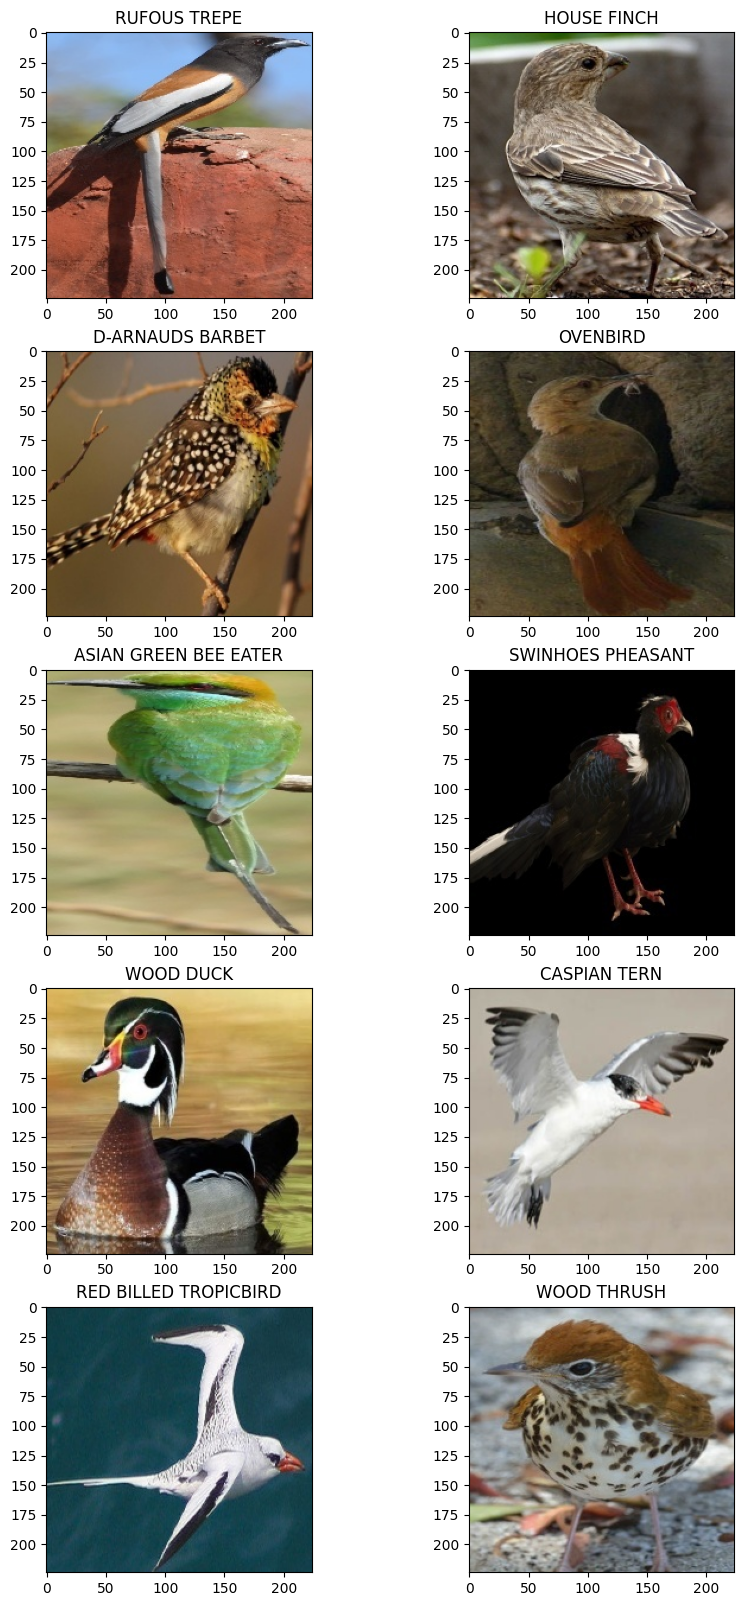

In [40]:
images10 = pd.DataFrame(columns=['Direccion imagen', 'Especie'])
plt.figure(figsize=(10,20))
for i in range(10):
  # Filtra el DataFrame data_10_images para seleccionar todas las filas que corresponden a la especie actual en la iteración del bucle.
  select = data_10_images[data_10_images.Especie == primeras_filas[i]]
  # Selecciona una imagen al azar
  select = select.sample()[['Direccion imagen', 'Especie']]
  # Concatena las filas seleccionadas al DataFrame images10, ignorando el índice original y creando uno nuevo.
  images10 = pd.concat([images10, select], ignore_index=True)
  # Lee la imagen correspondiente
  imagen = cv2.cvtColor(cv2.imread(images10.loc[i,'Direccion imagen']), cv2.COLOR_BGR2RGB)
  plt.subplot(5,2,i+1)
  plt.title(images10.loc[i,'Especie'])
  plt.imshow(imagen)
plt.show()

#Histograma de las 10 imagenes anteriores (Imagen aleatoria de cada una de las 10 especies con mas individuos)

**Los histogramas generados representan la distribución de intensidades de píxeles en cada una de las imágenes en escala de grises.**

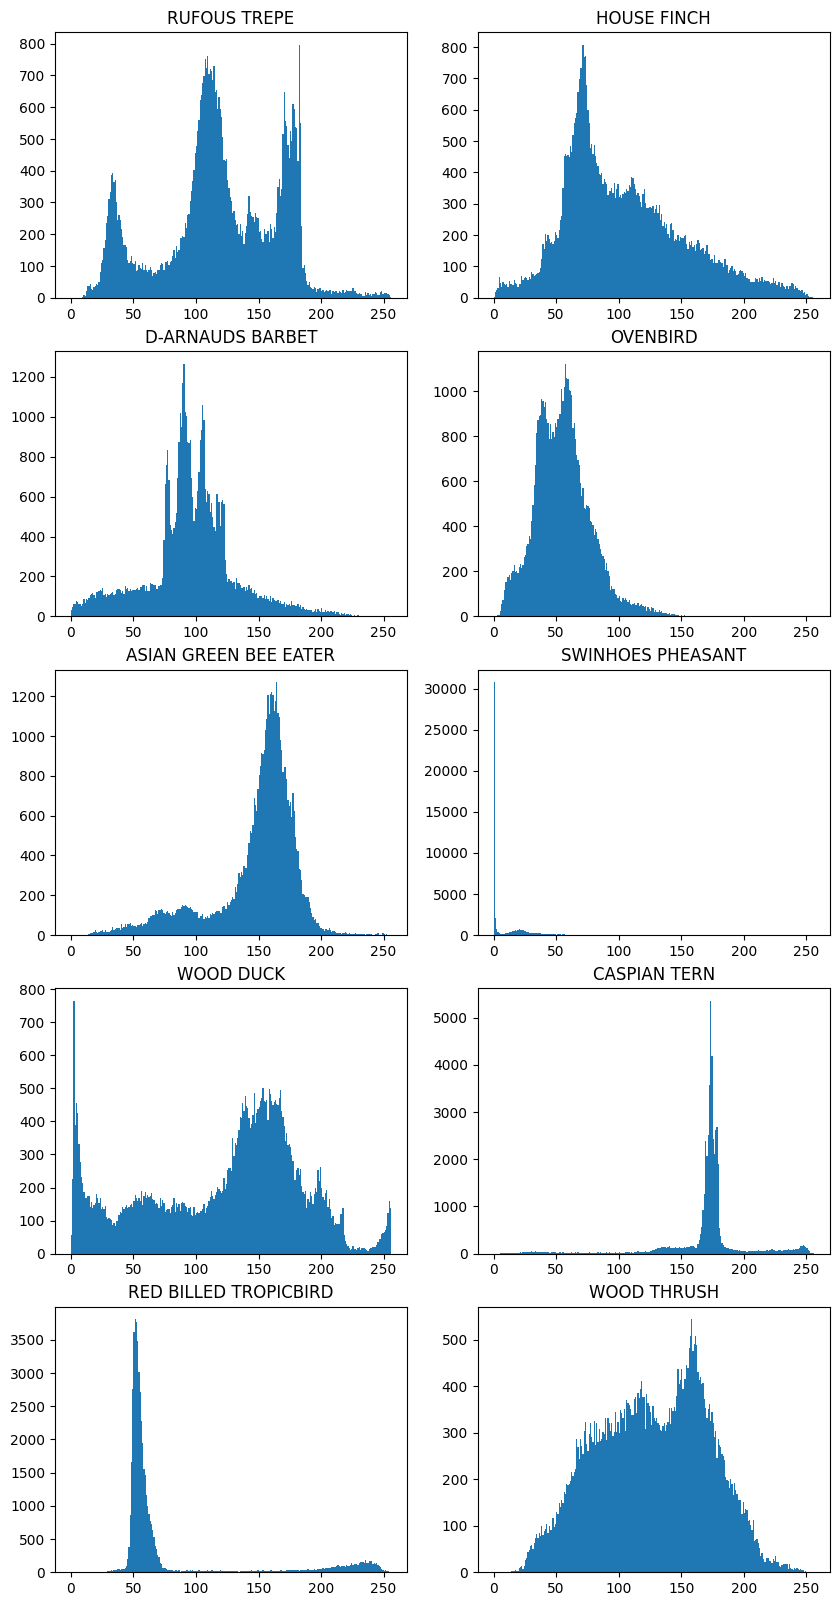

In [41]:
plt.figure(figsize=(10,20))
for i in range(10):
  plt.subplot(5,2,i+1)
  # Lee la imagen correspondiente a la iteración actual del bucle  y la convierte a escala de grises usando cv2.COLOR_BGR2GRAY.
  imagen = cv2.cvtColor(cv2.imread(images10.loc[i,'Direccion imagen']), cv2.COLOR_BGR2GRAY)
  plt.title(images10.loc[i,'Especie'])
  # imagen.flatten() se utiliza para aplanar la matriz de píxeles de la imagen en un arreglo unidimensional antes de pasarla al histograma(vectorizar)
  plt.hist(imagen.flatten(), bins=256, range=(0,256))
  del imagen
plt.show()

#Histograma en cada canal de las 10 anteriores (Imagen aleatoria de cada una de las 10 especies con mas individuos)
**Los histogramas generados muestran la distribución de intensidades de los diferentes canales de color (rojo, verde y azul) en las imágenes seleccionadas.**

- Esto es útil para el análisis y procesamiento de imágenes.

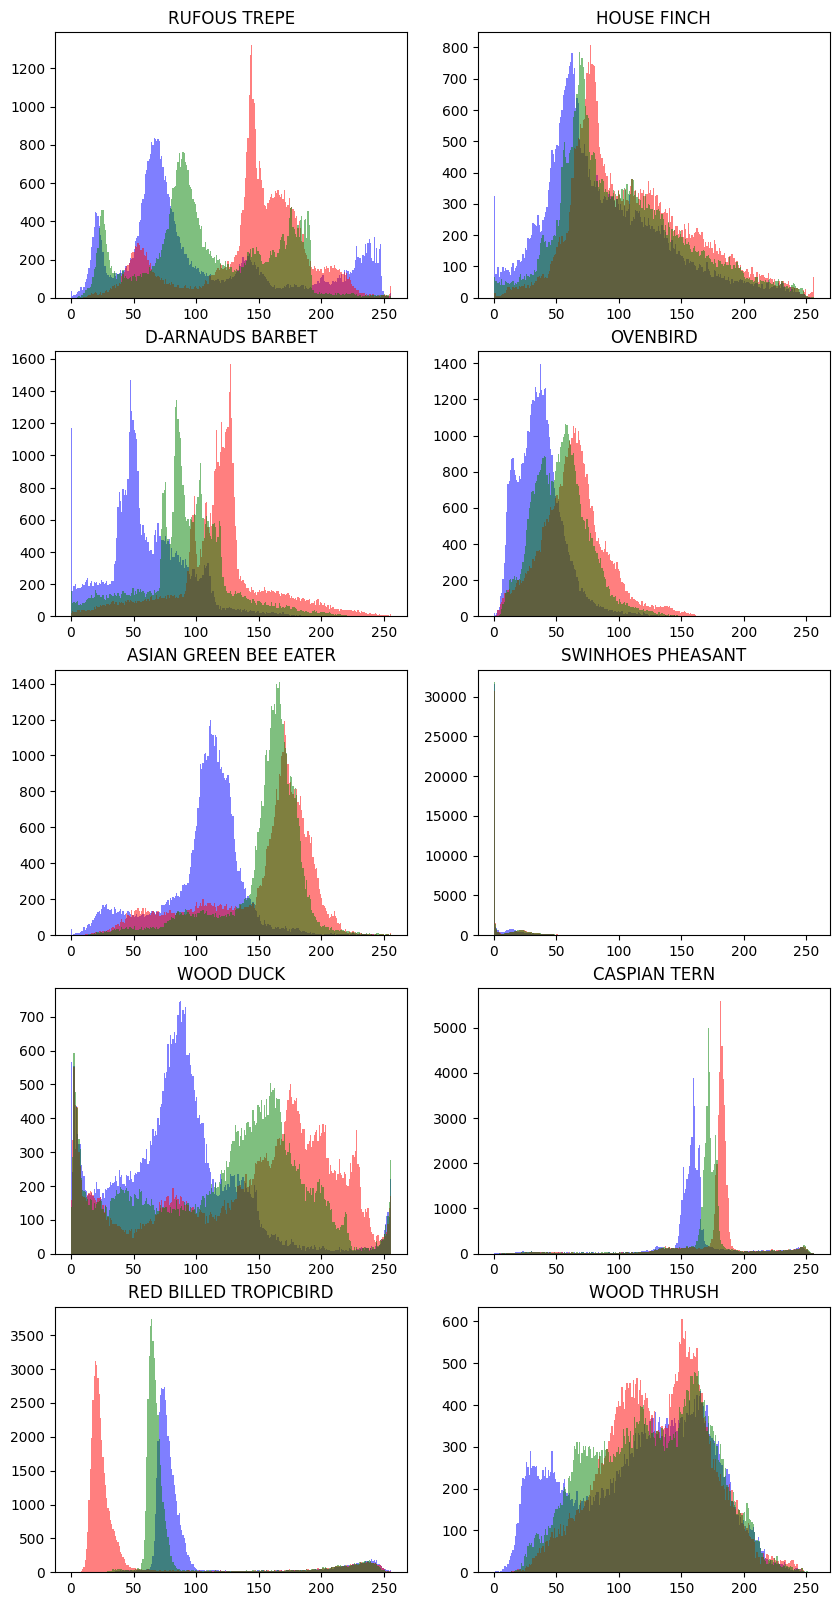

In [42]:
plt.figure(figsize=(10,20))
for i in range(10):
  plt.subplot(5,2,i+1)
  imagen = cv2.cvtColor(cv2.imread(images10.loc[i,'Direccion imagen']), cv2.COLOR_BGR2RGB)
  plt.title(images10.loc[i,'Especie'])
  # Genera tres histogramas superpuestos en el subplot actual, uno para cada canal de color (rojo, verde y azul).
  plt.hist(imagen[:,:,2].flatten(), bins=256, color='blue', alpha=0.5, range=(0,256))
  plt.hist(imagen[:,:,0].flatten(), bins=256, color='red', alpha=0.5, range=(0,256))
  plt.hist(imagen[:,:,1].flatten(), bins=256, color='green', alpha=0.5, range=(0,256))
  del imagen
plt.show()

#Promedio de todas las imagenes en el dataset actualizado (birds_update.csv)
**La imagen mostrada es el promedio de todas las imágenes del conjunto de datos**

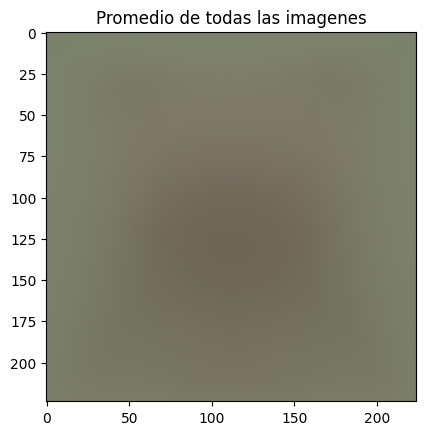

In [ ]:
# Cargamos la imagen que contiene el promedio de todas las imagenes en el dataset
# recordando que este se halló a la hora de verificar el shape de las imagenes
imagenProm = cv2.cvtColor(cv2.imread('promedio_imagen.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imagenProm)
plt.title('Promedio de todas las imagenes')
plt.show()
del imagenProm

# Promedio de las imagenes de cada especie (10 especies con más individuos)

-  Las imágenes promedio proporcionan una representación visual de las características comunes de las especies de aves en el conjunto de datos.

In [38]:
plt.figure(figsize=(10,20))
for i in range(10):
  imagenes = []
  for dir in data_10_images[data_10_images.Especie == primeras_filas[i]]['Direccion imagen']:
    imagen = cv2.cvtColor(cv2.imread(dir), cv2.COLOR_BGR2RGB)
    imagenes.append(imagen)
    del imagen

  imagenes = np.array(imagenes)
  # Se calcula la imagen promedio de todas las imágenes de la especie actual
  # tomando la media a lo largo del eje 0 (es decir, entre todas las imágenes)
  promedio = np.mean(imagenes, axis=0).astype(np.uint8)

  plt.subplot(5,2,i+1)
  plt.imshow(promedio)
  plt.title(primeras_filas[i])

  del imagenes
  del promedio

plt.show()

#Visualizando la superposición de 10 imagenes para la primera especie del conjunto de datos

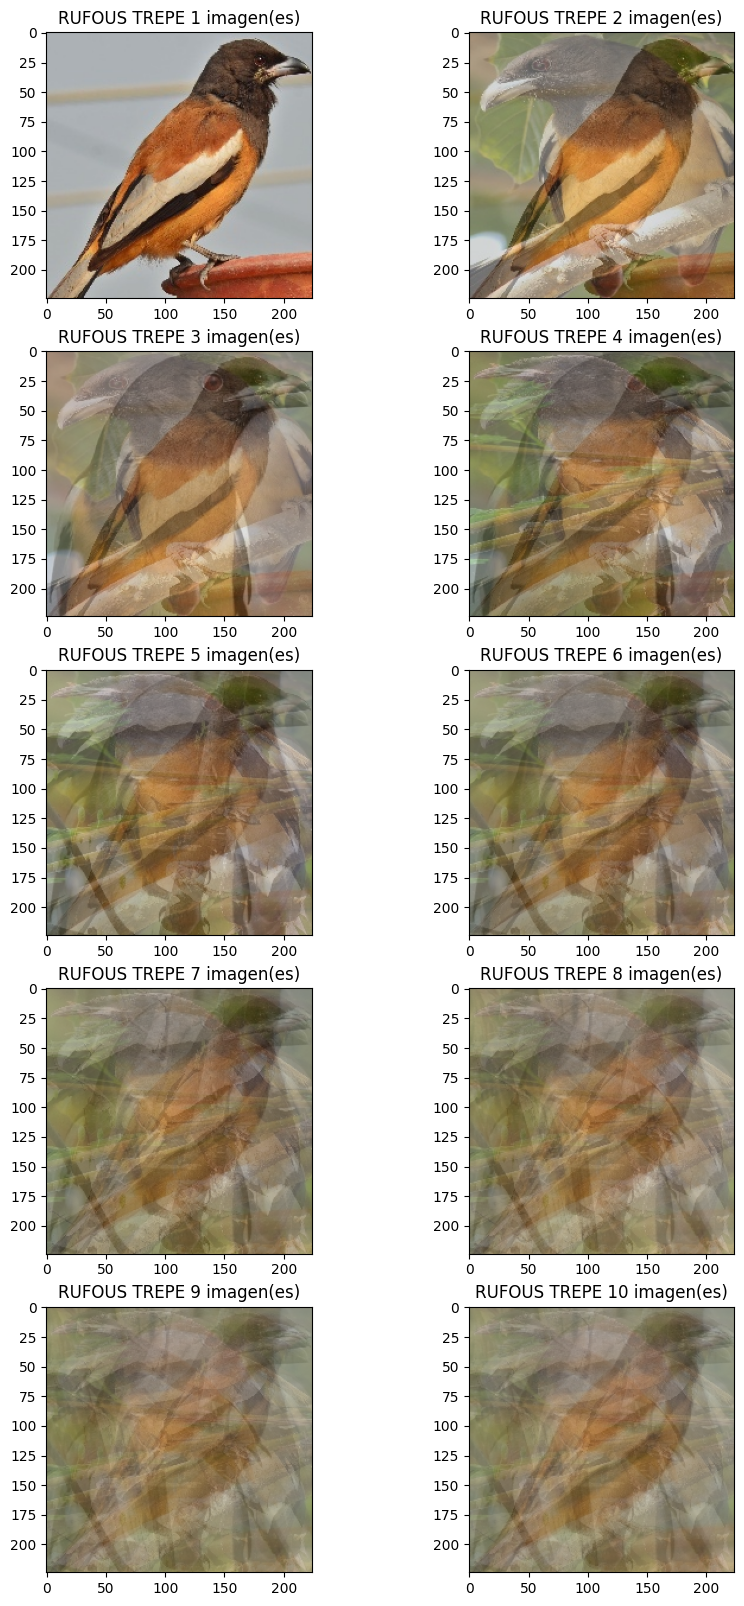

In [18]:
from pickle import TRUE
plt.figure(figsize=(10,20))
for i in range(10):
  imagenes = []
  data = data_10_images[data_10_images.Especie == primeras_filas[0]]['Direccion imagen']
  data = data.reset_index(drop=True)
  for index in range(i+1):
    imagen = cv2.cvtColor(cv2.imread(data[index]), cv2.COLOR_BGR2RGB)
    imagenes.append(imagen)
    del imagen

  imagenes = np.array(imagenes)
  # Se calcula la imagen promedio de todas las imágenes de la especie actual
  # tomando la media a lo largo del eje 0 (es decir, entre todas las imágenes)
  promedio = np.mean(imagenes, axis=0).astype(np.uint8)

  plt.subplot(5,2,i+1)
  plt.imshow(promedio)
  plt.title(primeras_filas[0] + " " + str(i+1) + " imagen(es)")

  del imagenes
  del promedio

plt.show()

#Desviacion estandar del total de imagenes para las 10 especies seleccionadas.
- Esta gráfica  proporciona información sobre la variabilidad y la consistencia de las características visuales entre las imágenes de las 10 especies representadas en el conjunto de datos, lo que puede ayudar a comprender mejor la diversidad y la morfología de estas especies.

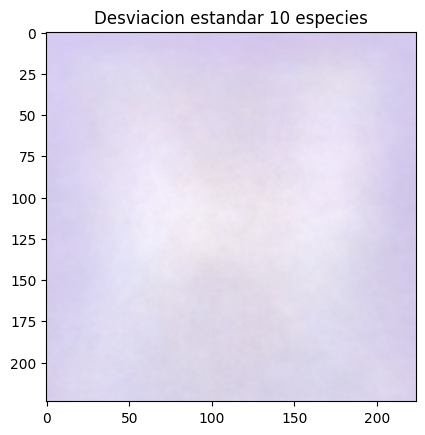

In [ ]:
imagenes = []
for dir in data_10_images['Direccion imagen']:
  imagen = cv2.cvtColor(cv2.imread(dir), cv2.COLOR_BGR2RGB)
  imagenes.append(imagen)
  del imagen

imagenes = np.array(imagenes)
# # Calcula la desviación estándar a lo largo del eje 0 (a través de las imágenes)
desviacion = np.std(imagenes, axis=0)
# # Normaliza la desviación estándar dividiendo por el valor máximo para escalar los valores entre 0 y 1
desviacion = (desviacion/desviacion.max())

plt.imshow(desviacion)
plt.title('Desviacion estandar 10 especies')

del imagenes
del desviacion


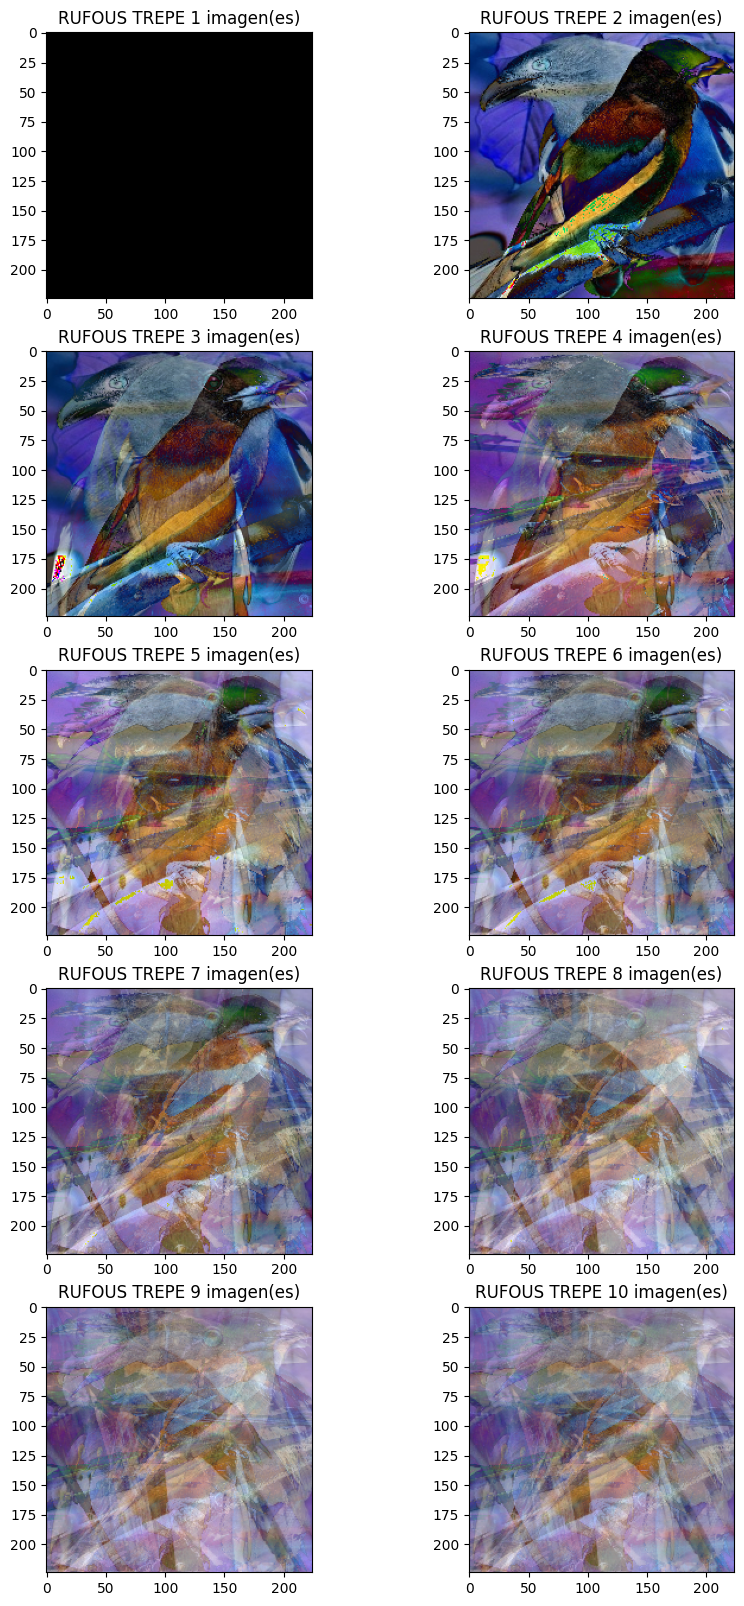

In [26]:
from pickle import TRUE
plt.figure(figsize=(10,20))
for i in range(10):
  imagenes = []
  data = data_10_images[data_10_images.Especie == primeras_filas[0]]['Direccion imagen']
  data = data.reset_index(drop=True)
  for index in range(i+1):
    imagen = cv2.cvtColor(cv2.imread(data[index]), cv2.COLOR_BGR2RGB)
    imagenes.append(imagen)
    del imagen

  imagenes = np.array(imagenes)
  # Se calcula la imagen promedio de todas las imágenes de la especie actual
  # tomando la media a lo largo del eje 0 (es decir, entre todas las imágenes)
  desviacion_estandar = np.std(imagenes, axis=0)
  #correcion gamma para visualizar mejor
  desviacion_estandar = (desviacion_estandar**1.2).astype(np.uint8)
  plt.subplot(5,2,i+1)
  plt.imshow(desviacion_estandar)
  plt.title(primeras_filas[0] + " " + str(i+1) + " imagen(es)")

  del imagenes
  del desviacion_estandar

plt.show()

# Desviacion estándar de las imagenes de cada una de las 10 especies seleccionadas

- Estas gráficas proporcionan información sobre la variabilidad y la consistencia de las características visuales entre las imágenes de las especies representadas

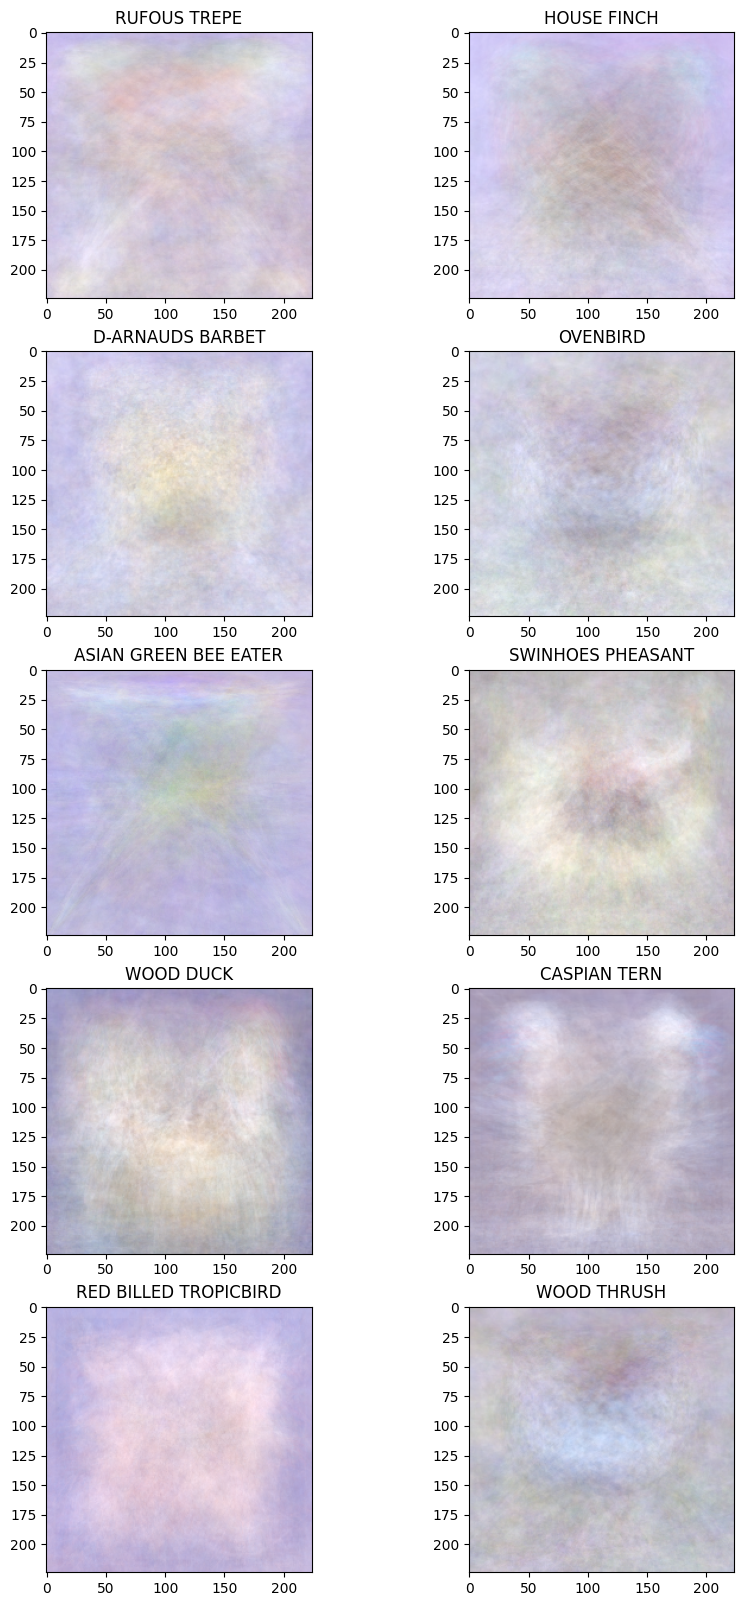

In [ ]:
#
plt.figure(figsize=(10,20))
for i in range(10):
  imagenes = []
  for dir in data_10_images[data_10_images.Especie == primeras_filas[i]]['Direccion imagen']:
    imagen = cv2.cvtColor(cv2.imread(dir), cv2.COLOR_BGR2RGB)
    imagenes.append(imagen)
    del imagen

  imagenes = np.array(imagenes)
  # Se calcula la desviación estándar para cada píxel a lo largo de todas las imágenes.
  # Luego, la desviación estándar se normaliza dividiendo por el valor máximo.
  desviacion = np.std(imagenes, axis=0)
  desviacion = (desviacion/desviacion.max())

  plt.subplot(5,2,i+1)
  plt.imshow(desviacion)
  plt.title(primeras_filas[i])

  del imagenes
  del desviacion

plt.show()

##Gráfico de barras para las 10 especies con más individuos.
*El gráfico de barras muestra la distribución de las 10 especies con mayor cantidad de individuos asociados. Por lo que, cada barra representa una de las diez especies seleccionadas, mientras que la altura de la barra indica la cantidad de individuos observados para esa especie en particular.*

- El gráfico de barras proporciona una representación visual clara de la composición y abundancia relativa de las especies en el conjunto de datos, lo que nos ayuda a comprender mejor la biodiversidad y los posibles procesos ecológicos en juego.

In [ ]:
count10 = conteo.head(10)

# Generar colores aleatorios
colores = np.random.rand(count10.shape[0], 3)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
bars = ax.bar(count10['Especie'], count10['Cantidad'], color=colores)

# Añadir etiquetas y título
ax.set_title('Top 10 Especies')
ax.set_xlabel('Especies')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#Grafico de torta para las 10 especies con más individuos
*El gráfico de pastel presenta la distribución de las 10 especies con mayor cantidad de individuos asociados. Cada porción del pastel representa una especie diferente, donde el tamaño de cada porción refleja la proporción de individuos observados para esa especie en particular. Similar a repartir una tarta, las porciones más grandes indican una mayor abundancia de la especie correspondiente, mientras que las porciones más pequeñas representan especies menos comunes o menos abundantes.*

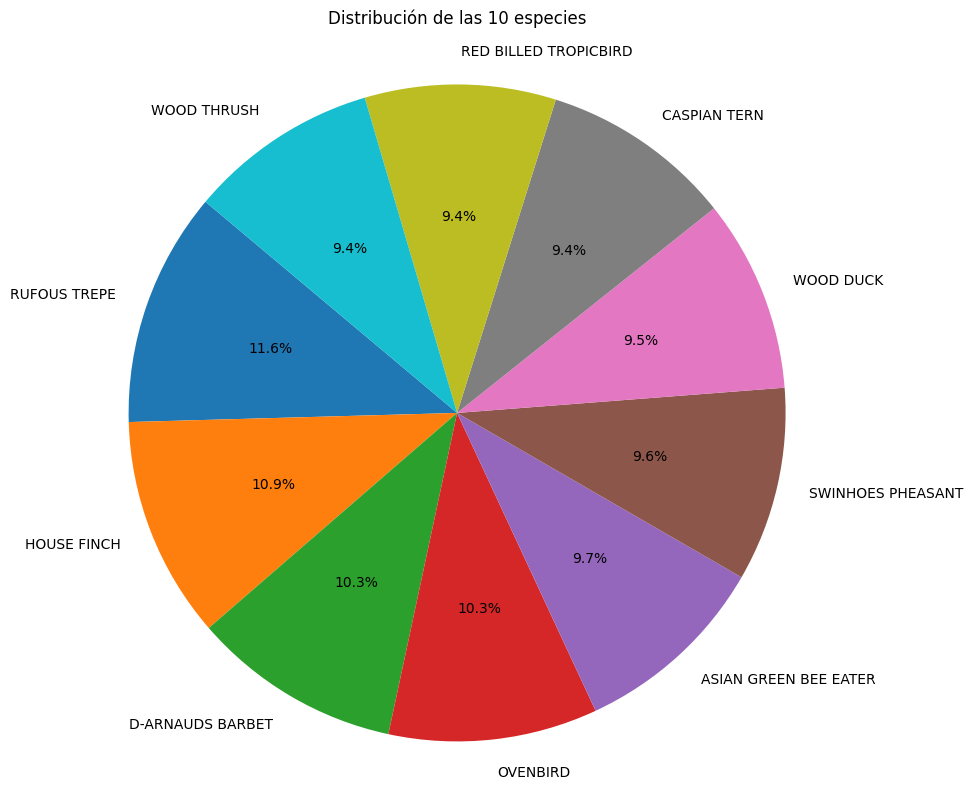

In [ ]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Graficar el pastel
plt.pie(count10['Cantidad'], labels=count10['Especie'],autopct='%1.1f%%', startangle=140)

# Añadir título y ajustar la separación
plt.title('Distribución de las 10 especies', pad=20)

# Mostrar la gráfica
plt.axis('equal')  # Para asegurar que la gráfica sea un círculo
plt.tight_layout()
plt.show()

# Eliminamos la variable count10 por cuestiones de memoria
del count10